# Introduction

We can define a socket as a quick connection which allows the transmission of data between two processes on the same machine or different machines over a network. It is commonly used in client-server interaction, as sockets allow applications to communicate using the built-in mechanisms of the hardware and operating system.


Many of the today’s most used software – including web browsers, file sharing software, and social media instant messaging applications like WhatsApp and others – fundamentally depend on the concept of sockets.


Usually, a socket program is comprised of two main programs called the client and server. Here, the client acts as the requester, where it requests some data. The server acts as the listener and provides the client the requested data as the response.


In Python, creating a client and server program is a simple task, as Python has many inbuilt modules to help with this.

# How to Code the Server

First, let's code our server program. To keep it simple, let's assume that the server listens to the host on a particular port. Whatever data it receives, it just prints and send some random ASCII letters as a response.

In [ ]:
# server.py
# Importing neccessary inbuilt modules
import socket
import random
import string

# Creating a socket instance
server_object = socket.socket(family=socket.AF_INET, type=socket.SOCK_STREAM)

# Connecting to the localhost
ip_address = '127.0.0.1'
port = 5555
server_object.bind((ip_address, port))
server_object.listen()

#Once the client connects to the particular port, the server starts to accept the request.
connection_object, _ = server_object.accept()


if connection_object:
    # Connected to client successfully
    print("SERVER CONNECTED TO CLIENT")
    
    # sending initial message to the client
    connection_object.send(b"type the message")
    
    # receiving message from the client
    data_receive = connection_object.recv(1024)
    
    while data_receive != b'stop':
        print("{}: {}".format("CLIENT MESSAGE: ", data_receive.decode('utf-8')))
        server_input = random.choice(string.ascii_letters)
        connection_object.send(server_input.encode('utf-8'))
        data_receive = connection_object.recv(1024)

In the above code, we created a socket instance for the server. You can see that family=socket.AF_INET defines the address family that this socket can accept – only IPv4 addresses. And type=socket.SOCK_STREAM defines that the socket accepts only TCP (Transmission Control Protocol) connections.


For the server socket instance to listen and accept requests, it needs an IP address and a port. So, we have ip_address = '127.0.0.1' and port = 5555. Here, we have localhost as our IP address as the server and client reside in the same machine.


In the next step, the server instance server_object establishes (binds) an address so that clients can use it to find the server. The bind((ip_address,port)) method assigns a local IP address and a port number to this server_object instance explicitly as the server programs listens on the published port port. A port and local IP address neds to be assigned.

It then starts to actively listens on that particular port. When the client connects to that port from the client side, the server instance accepts the client's request for a connection. It then creates a new connection_object and returns to the server instance.


This connection_object contains all the necessary information about the client and server. Now, we use this connection_object to send a message from the server to client. So we print a SERVER CONNECTED TO CLIENT message if the connection_object is created successfully.


Once the connection_object is created, then the instance sends an initial message type the message in bytes to the client and receives the request from the client.


In the while loop, the connection instance connection_object prints the client message. Then as a response it sends random ASCII letters and waits for the client request. This while loop will execute in the server program until the client sends the request message stop.

# How to Code the Client

Up to this point, we have seen the server side code. Now, lets code the client side  which is pretty simple.

In [ ]:
# client.py

#importing socket module
import socket

# creating socket instance
client_object = socket.socket(family=socket.AF_INET, type=socket.SOCK_STREAM)

# target ip address and port
ip_address = '127.0.0.1'
port = 5555

# instance requesting for connection to the specified address and port
client_object.connect((ip_address,port))

# receiving response from server
data_receive = client_object.recv(1024)

# if response is not null
if data_receive:
    # Connection is successful
    print("CLIENT CONNECTED TO SERVER")
    print(data_receive.decode('utf-8'))
    
    
    while data_receive:
        # user input
        client_input = input().encode('utf-8')
        
        # sending request to the server
        client_object.send(client_input)
        
        # receiving response from the server
        data_receive = client_object.recv(1024)
        if data_receive:
            print("{}: {}".format("SERVER",data_receive.decode('utf-8')))

In the client side code, we have created a similar socket instance client_object, the target ip_address, and port, just like we created in the server side program.


The next step is to use the client_object instance and connect to the respective target address and port using the connect() method.


Once the connection is successful and the connection_object is created on the server side, then the server sends the response type the message which gets stored in the data_receive in the client side.


Since the server has sent the message, we use this message to confirm that the connection is successful. So, we print CLIENT CONNECTED TO SERVER and then print the message sent by the server type the message.


In the while loop, we first give the input in a string using the input() inbuilt function. Then we convert it to bytes using the encode('utf-8') method and store it in client_input (as the data can be sent only in bytes). We then send the client_input to the server using client_object.send(client_input).


We receive the response data from the server after sending the request to the server. The server will accept and give a response to the client until the user types stop as a request to the server.


Note: We have to first execute the server program and then the client program because when client wants to connect to the target, there should be a server listening, up and running.

Here's the execution of of server.py and then client.py:

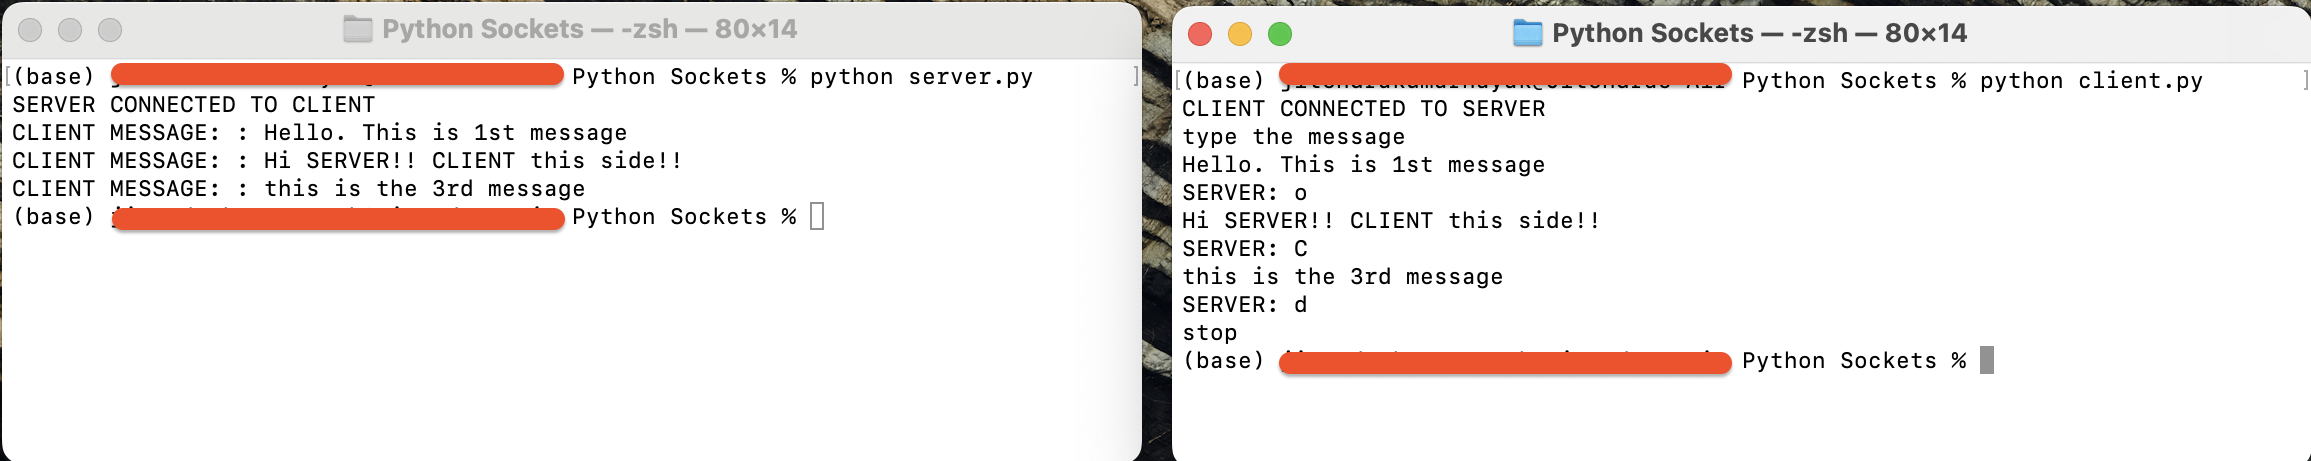

                            Left-Side: Server Program, Right-Side: Client Program

As you can see, once the execution started, the server displayed SERVER CONNECTED TO CLIENT so the user can tell it's working, and sent the initial message to the client.


On the client side, when the client received the message, it displayed CLIENT CONNECTED TO SERVER and also printed type the message received from the client.


Since the client is waiting for the input from the user, once the user entered the input, it sends it to the server and the server prints the client message. It then sent the random ASCII letter as the response to the client.


The flow looped until the client sent the stop message as the request to the server. Once the server received the stop request, it terminated from the socket session.

# Conclusion

In this tutorial, We understood socket is one of the most fundamental technologies of computer networking and learnt how to set up a socket program in Python using the socket module in client-side and server-side programs.

Reference - https://www.freecodecamp.org/news/socket-programming-in-python/